In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/data3/ch2_scores_em.csv',
                 index_col='student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


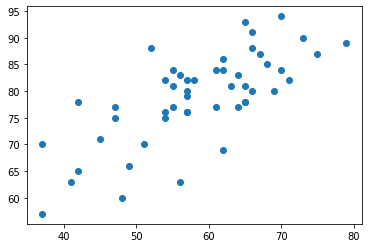

In [4]:
plt.scatter(df['english'], df['mathematics'])
plt.show()

In [5]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## axhline()
- add horizontal line

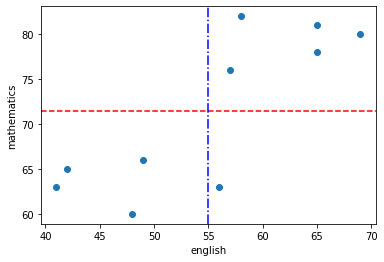

In [6]:
plt.xlabel( 'english') 
plt.ylabel( 'mathematics') 
plt.scatter( scores_df['english'], scores_df['mathematics'])
plt.axhline( scores_df['mathematics'].mean() , color='r', ls='--') # axhline() -> 수평선 그림
plt.axvline( scores_df['english'].mean() , color='b', ls='-.') # axvline() -> 수직선 그림
plt.show()

In [7]:
scores_df['english'].mean()

55.0

In [8]:
scores_df['mathematics'].mean()

71.4

# 공분산
- 두 데이터 사이의 **관계**를 나타내는 지표
- 만약 2개의 변수중 하나의 값이 상승하는 경향을 보일 때, 다른 값도 상승하는 경향의 상관관계에 있다면, 공분산의 값은 양수가 될 것<br>
<br>

- 양의 값
    - **면적**이 양의 값이 되는 데이터가 많다 ( + 끼리, 또는 -끼리 곱한다)
    - **양의 상관 관계**

- 음의 값
    - 면적이 음의 값이 되는 데이터가 많다는 뜻 
    - 음의 산관 관계
    
- 0 에 가까우면 무상관
    - +와 -가 섞여있을 때


- 공분산의 값들이 +가 많으면 양의 상관관계를 보인다

In [9]:
summary_df = scores_df.copy()

# 영어점수 편차
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
# 수학점수 편차
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()

# 공분산: 영어점수 편차와 수학점수 편차를 곱한 것
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']

summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [10]:
summary_df['product of deviations'].mean()

62.8

In [11]:
eng = summary_df['english']
mat = summary_df['mathematics']

In [12]:
def covariance(X, Y): 
    ax, ay = X.mean(), Y.mean()
    data = [round((ax-x)*(ay-y),2) for x, y in zip(X, Y)]
    print('data:',data)
    return sum(data) / len(X)

In [13]:
covariance( eng, mat )

data: [83.2, 120.4, -8.4, 117.6, 9.2, 79.8, 96.0, 32.4, 66.0, 31.8]


62.8

In [14]:
np.cov( eng, mat, ddof = 0 ) # 표본추출인 경우 n-1로 나누게 되어 이

# ddof = 0 -> 모집단, n으로 나눈다( 데이터 갯수 )
# ddof = 1 -> 표본, n-1로 나눈다. 

# 영어점수와 영어점수의 공분산( 영어점수의 분산 ) , 영어점수와 수학점수
# 수학점수와 영어점수, 수학 점수와 수학점수( 수학점수의 분산 ) 

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [15]:
summary_df['english'].values.var()
# series 멤버함수인 var는 ddof=1

86.0

# 상관계수
- 단위에 의존하지 않는 상관관계 지표
- 편차로 나눈다 0, -1~1 사이의 값
- **공분산을 표준화**

In [44]:
np.cov( eng, mat, ddof = 0 )[0,1] # 영어와 수학의 공분산

62.800000000000004

In [48]:
np.cov( eng, mat , ddof=0 )[0,1] / ( np.std(eng)*np.std(mat) )

0.8185692341186713

In [51]:
np.corrcoef( eng, mat )

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [17]:
np.corrcoef( eng, mat )[0,1] # 상관계수

0.8185692341186712

In [52]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


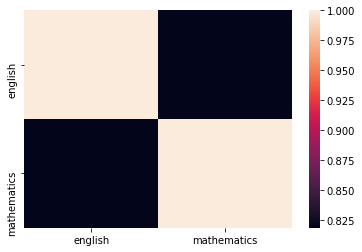

In [19]:
import seaborn as sns
sns.heatmap(scores_df.corr() )
plt.show()